# Introduction

Pour notre projet tutoré de fin d'année, il nous a été demandé de réaliser un projet en rapport avec la data science, sur une période d'envirion deux mois, en binôme, sur Python. La réalisation se porte sur les données des taxis new-yorkais, ces-derniers provenant sur site gouvernemantale de la ville de New York City. <br/>
L'objectif est de présenter le meilleur modèle, parmi trois, de Machine Learning permettant la prédiction du prix de la course. La portée de l'étude se déroule sur la période de mai 2020. Notre target étant de type numérique, nous utiliserons ainsi des modèles de régression.

## Infos diverses 

- Source des données: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
- Portée de l'étude: mois de mai 2020
- Période: du 29/04/2022 au 01/07/2022
- Target y: 'total_amount'
- Lien Github: yen a pas bien sûr

### Acteurs (meilleur duo bien sûr ツ): 
Rayan Awasil <br/>
Islam Bensaad

test github <br/>
essai d'une nouvelle branche

# Dynamique du rapport

Pour réaliser cette étude, nous allons d'abord dans un premier temps explorer nos données via les méthodes de statistiques descriptives. Puis, nous allons préparer nos données afin d'avoir une base de travail la plus propre possible pour réaliser nos modèles. Enfin, nous finirons sur les modèles de Machine Learning à proprement parlé.

## Plan

1. Exploration du jeu de données
2. Sélection des variables & nettoyage des données
3. Modèles de Machine Learning

# 1. Analyse exploratoire des données

Afin de pouvoir réaliser cette étude, il est nécessaire d'importer les librairies nécessaires de Data Science, consultable et exploitable sur PyPi. <br/>
Lien web: https://pypi.org/

In [23]:
# traitement des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# les différents modèles
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors

# les différentes mesures pour aider à l'analyse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# optimisation des modèles
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

On charge dans un premier temps le fichier dans un dataframe, et on affiche le nombre de lignes et de colonnes.

In [24]:
taxi = pd.read_csv('yellow_tripdata_2020-05.csv')
taxi.shape

C:\Users\rayan_\AppData\Local\Temp\ipykernel_4188\2422764065.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  taxi = pd.read_csv('yellow_tripdata_2020-05.csv')


(348371, 18)

On a ainsi un fichier initial de 348 371 lignes et 18 colonnes.

On affiche les cinq premières lignes.

In [25]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-05-01 00:02:28,2020-05-01 00:18:07,1.0,0.0,1.0,N,234,256,1.0,12.2,3.0,0.5,2.4,0.0,0.3,18.4,2.5
1,1.0,2020-05-01 00:23:21,2020-05-01 00:26:01,2.0,0.4,1.0,N,264,264,1.0,4.0,0.5,0.5,0.5,0.0,0.3,5.8,0.0
2,1.0,2020-05-01 00:54:58,2020-05-01 00:57:11,1.0,0.3,1.0,N,264,264,2.0,3.5,0.5,0.5,0.0,0.0,0.3,4.8,0.0
3,1.0,2020-05-01 00:07:10,2020-05-01 00:12:46,1.0,1.7,1.0,N,107,229,2.0,7.0,3.0,0.5,0.0,0.0,0.3,10.8,2.5
4,1.0,2020-05-01 00:55:47,2020-05-01 01:01:54,0.0,0.9,1.0,N,237,262,1.0,6.0,3.0,0.5,1.2,0.0,0.3,11.0,2.5


Résumé statistique avant le traitement des valeurs manquantes.

In [26]:
taxi.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,289480.000000,289480.000000,348371.000000,289480.000000,348371.000000,348371.000000,289480.000000,348371.000000,348371.000000,348371.000000,348371.000000,348371.000000,348371.000000,348371.000000,348371.000000
mean,1.564139,1.314208,8.333688,1.043067,152.593505,148.479233,1.423231,14.942190,0.956279,0.490154,1.427909,0.435684,0.297107,19.674624,1.840390
std,0.495870,0.984035,774.866832,0.969507,70.862650,74.815690,0.554263,727.787407,1.248752,0.083839,2.509379,1.910827,0.040546,727.919276,1.118676
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-240.000000,-4.500000,-0.500000,-11.060000,-13.750000,-0.300000,-244.300000,-2.500000
25%,1.000000,1.000000,1.050000,1.000000,90.000000,75.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,10.300000,0.000000
50%,2.000000,1.000000,1.990000,1.000000,143.000000,143.000000,1.000000,9.000000,0.000000,0.500000,0.010000,0.000000,0.300000,13.800000,2.500000
75%,2.000000,1.000000,4.250000,1.000000,231.000000,230.000000,2.000000,16.000000,2.500000,0.500000,2.450000,0.000000,0.300000,21.300000,2.500000
max,2.000000,9.000000,297004.510000,99.000000,265.000000,265.000000,4.000000,429496.720000,65.530000,3.300000,442.180000,200.000000,0.300000,429562.250000,2.500000


On a ainsi un premier aperçu de nos données sans aucun traitement au préalable, on constate qu'il y a un certain nombre de soucis dans nos données, que l'on traitera par la suite.

On peut réaliser un diagramme circulaire pour observer la répartition de nos types de données.

<AxesSubplot:ylabel='None'>

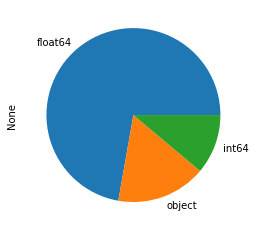

In [27]:
taxi.dtypes.value_counts().plot.pie()

On regarde le pourcentage de valeurs manquantes par rapport à la totalité des enregistrements dans notre dataframe.

In [28]:
# - on somme le nombre de valeurs manquantes
# - on divise par le nombre total de lignes
# - on trie par ordre décroissant
(taxi.isnull().sum() / taxi.shape[0]).sort_values(ascending = False)

VendorID                 0.169047
RatecodeID               0.169047
store_and_fwd_flag       0.169047
payment_type             0.169047
passenger_count          0.169047
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
PULocationID             0.000000
DOLocationID             0.000000
tpep_pickup_datetime     0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
dtype: float64

Représentation graphique des valeurs manquantes (lecture de l'échelle):
- en blanc: les valeurs manquantes (= 1)
- en noir: les valeurs non manquantes (= 0)

<AxesSubplot:>

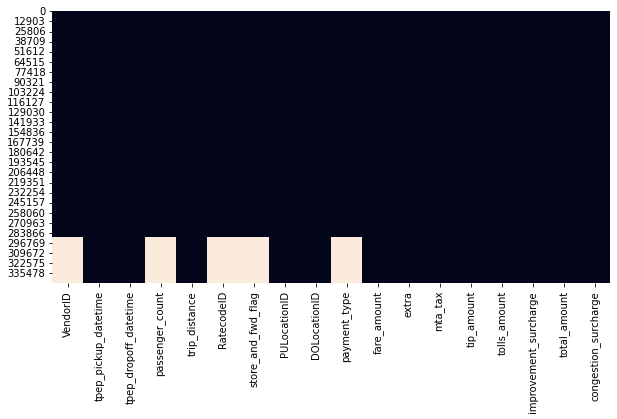

In [29]:
plt.figure(figsize = (10, 5))
sns.heatmap(taxi.isna(), cbar = False)

In [30]:
taxi[taxi.isna()['VendorID']].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
289480,NaN,2020-05-01 07:15:00,2020-05-01 07:27:00,NaN,2.16,NaN,NaN,48,137,NaN,9.94,0.0,0.5,0.0,0.00,0.3,13.24,2.5
289481,NaN,2020-05-01 07:13:00,2020-05-01 07:45:00,NaN,15.29,NaN,NaN,188,42,NaN,49.02,0.0,0.5,0.0,0.00,0.3,52.32,2.5
289482,NaN,2020-05-01 07:43:04,2020-05-01 08:15:28,NaN,12.63,NaN,NaN,196,159,NaN,28.38,0.0,0.5,0.0,6.12,0.3,35.30,0.0
289483,NaN,2020-05-01 07:11:47,2020-05-01 07:29:48,NaN,7.68,NaN,NaN,137,56,NaN,23.14,0.0,0.5,0.0,6.12,0.3,32.56,2.5
289484,NaN,2020-05-01 07:20:00,2020-05-01 07:31:00,NaN,3.86,NaN,NaN,169,42,NaN,13.13,0.0,0.5,0.0,0.00,0.3,13.93,0.0


On remarque qu'il nous manque des infos sur la clé unique du dataset, à savoi le 'vendor_id'. Ces lignes manquantes se répercutent sur les autres variables, c'est-à-dire que pour chaque ligne ayant des valeurs manquantes, il nous manque à la fois les infos sur:
- ["vendor_id", "passenger_count", "rate_code_id", "store_and_fwd_flag", "payement_type"] <br/>

On a seulement 16% d'enregistrements comportant des valeurs manquantes dans notre dataset, et ce sont exactement les mêmes enregistrements qui présentent des valeurs manquantes (comme énumérée plus haut). Pour toutes ces raisons, et en considérant avoir une base de travail avec beaucoup de données, on estime perdre peu en en ôtant ces enregistrements, donc on choisit de supprimer ces lignes de notre dataset afin de ne pas fausser les analyses.

### Nettoyage des données

On supprime les valeurs manquantes de notre dataset.

In [31]:
taxi.dropna(inplace = True)
taxi.shape

(289480, 18)

Résumé statistique après la suppression des valeurs manquantes.

In [32]:
taxi.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000
mean,1.564139,1.314208,2.731006,1.043067,157.154066,151.584503,1.423231,12.650259,1.148115,0.491736,1.559227,0.160921,0.296522,17.478461,2.037726
std,0.495870,0.984035,20.695962,0.969507,70.259291,74.551948,0.554263,798.341340,1.287057,0.081862,2.664146,1.249215,0.044436,798.479815,0.993512
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-240.000000,-4.500000,-0.500000,-11.060000,-13.750000,-0.300000,-244.300000,-2.500000
25%,1.000000,1.000000,0.940000,1.000000,100.000000,79.000000,1.000000,5.500000,0.000000,0.500000,0.000000,0.000000,0.300000,9.800000,2.500000
50%,2.000000,1.000000,1.700000,1.000000,151.000000,147.000000,1.000000,8.000000,0.500000,0.500000,1.000000,0.000000,0.300000,12.800000,2.500000
75%,2.000000,1.000000,3.100000,1.000000,234.000000,233.000000,2.000000,12.500000,2.500000,0.500000,2.450000,0.000000,0.300000,17.880000,2.500000
max,2.000000,9.000000,10973.550000,99.000000,265.000000,265.000000,4.000000,429496.720000,65.530000,3.300000,442.180000,200.000000,0.300000,429562.250000,2.500000


Il nous a été demandé de prédire notre target indépendamment de certains features présentes dans le dataset au départ, on supprime donc les colonnes que nous n'utiliserons pas pour déterminer notre y (ici la variable "total_amount").

In [33]:
taxi.drop(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge'],
         axis = 1,
         inplace = True)

taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
0,1.0,2020-05-01 00:02:28,2020-05-01 00:18:07,1.0,0.0,1.0,N,234,256,1.0,18.4
1,1.0,2020-05-01 00:23:21,2020-05-01 00:26:01,2.0,0.4,1.0,N,264,264,1.0,5.8
2,1.0,2020-05-01 00:54:58,2020-05-01 00:57:11,1.0,0.3,1.0,N,264,264,2.0,4.8
3,1.0,2020-05-01 00:07:10,2020-05-01 00:12:46,1.0,1.7,1.0,N,107,229,2.0,10.8
4,1.0,2020-05-01 00:55:47,2020-05-01 01:01:54,0.0,0.9,1.0,N,237,262,1.0,11.0


In [34]:
taxi.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000,289480.000000
mean,1.564139,1.314208,2.731006,1.043067,157.154066,151.584503,1.423231,17.478461
std,0.495870,0.984035,20.695962,0.969507,70.259291,74.551948,0.554263,798.479815
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-244.300000
25%,1.000000,1.000000,0.940000,1.000000,100.000000,79.000000,1.000000,9.800000
50%,2.000000,1.000000,1.700000,1.000000,151.000000,147.000000,1.000000,12.800000
75%,2.000000,1.000000,3.100000,1.000000,234.000000,233.000000,2.000000,17.880000
max,2.000000,9.000000,10973.550000,99.000000,265.000000,265.000000,4.000000,429562.250000


On peut maintenant faire quelques constats: 

- trip_distance: max à 10973, ce qui n'a pas de sens car il semble étonnant qu'un taxi est parcourut 10 000 miles pour une course. Egalement, on a un écart-type élevé
- ratecodeid: max à 99, d'après notre dictionnaire de données, cette variable est une variable ordinale censée être comprise entre un et six
- total_amount: montant en négatif, no comment

On vérifie le nombre de valeurs uniques pour le rate_code_id.

In [35]:
taxi['RatecodeID'].unique()

array([ 1.,  2.,  5., 99.,  3.,  4.,  6.])

On compte le nombre d'enregistrements avec un total_amount négatif.

In [36]:
temp = taxi['total_amount'] < 0
temp.value_counts()

False    287963
True       1517
Name: total_amount, dtype: int64

On se fixe une distance maximum de 350km, ce qui nous semble raisonnable pour une course de taxi, en particulier pour une ville densémment peuplée telle que New York City. Ici on voit bien que l'on a seulement un seul enregistrement aberrant qui fausse l'écart type.<br/>
Note: à priori, la plus grande distance entre le Nord et le Sud serait d'environ 35 miles.

In [37]:
taxi[taxi['trip_distance'] > 350]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
29008,2.0,2020-05-04 17:26:27,2020-05-04 18:40:37,1.0,10973.55,5.0,N,147,137,2.0,19.29


C'est d'autant plus frappant que le client n'est payé qu'une petite somme pour un trajet si long.

On peut également vérifier si on a des trajets avec une distance égale à zéro.

In [38]:
taxi[taxi['trip_distance'] == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
0,1.0,2020-05-01 00:02:28,2020-05-01 00:18:07,1.0,0.0,1.0,N,234,256,1.0,18.4
45,1.0,2020-05-01 00:32:39,2020-05-01 00:48:16,1.0,0.0,1.0,N,137,69,1.0,28.0
72,1.0,2020-05-01 00:23:55,2020-05-01 00:24:17,1.0,0.0,2.0,N,79,79,4.0,55.3
73,1.0,2020-05-01 00:24:44,2020-05-01 00:35:15,1.0,0.0,1.0,N,107,140,4.0,10.8
131,1.0,2020-05-01 01:18:42,2020-05-01 01:29:18,1.0,0.0,1.0,N,146,82,1.0,13.2
...,...,...,...,...,...,...,...,...,...,...,...
289399,1.0,2020-05-31 23:09:35,2020-05-31 23:27:07,1.0,0.0,1.0,N,61,222,1.0,18.0
289425,1.0,2020-05-31 23:12:10,2020-05-31 23:26:18,1.0,0.0,1.0,N,107,65,1.0,16.1
289426,1.0,2020-05-31 23:57:40,2020-06-01 00:25:49,1.0,0.0,1.0,N,232,177,1.0,21.0
289473,2.0,2020-05-31 23:07:50,2020-05-31 23:08:50,1.0,0.0,5.0,N,237,237,2.0,12.8


On voit ici qu'on a des enregistrements avec une distance égale à 0, sur des très court intervalle de temps, avec un montant, très élevé pour certains, qui a été débité. Il y a peut-être eu une erreur de saisie pour la distance ou le montant. Dans tout les cas, on supprime les valeurs.

On supprime également toutes les lignes qui ne correspondent pas au mois de Mai 2020.<br/>
Note: on s'aperçoit que pour deux enregistrements, le client a été pris en charge en avril et a été déposé en mai, hors cela ne rentre pas dans notre plage temporelle d'étude.

In [39]:
taxi[taxi['tpep_pickup_datetime'] < '2020-05-01 00:00:00']

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
598,2.0,2020-04-30 17:55:31,2020-04-30 18:00:22,1.0,1.16,1.0,N,238,236,2.0,9.30
599,2.0,2020-04-30 18:18:23,2020-05-01 17:30:12,1.0,1.07,1.0,N,249,249,2.0,11.80
1065,2.0,2020-04-30 17:37:42,2020-04-30 17:48:31,1.0,2.77,1.0,N,230,263,1.0,16.56
1066,2.0,2020-04-30 18:12:23,2020-05-01 17:29:16,1.0,5.32,1.0,N,142,231,2.0,19.80
35086,2.0,2009-01-01 02:19:49,2009-01-01 02:23:35,3.0,0.98,1.0,N,74,75,2.0,5.80
35718,2.0,2009-01-01 02:53:54,2009-01-01 13:33:14,3.0,2.47,1.0,N,230,264,2.0,13.80
97408,2.0,2008-12-31 23:05:47,2008-12-31 23:33:33,1.0,3.38,1.0,N,25,89,2.0,16.80
210013,2.0,2009-01-01 00:57:36,2009-01-01 01:05:48,3.0,1.68,1.0,N,236,162,2.0,11.80


In [40]:
taxi[taxi['tpep_pickup_datetime'] > '2020-06-31 00:00:00']

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
126889,2.0,2020-07-18 00:10:28,2020-07-18 00:16:33,1.0,1.74,1.0,N,246,143,1.0,13.56
127625,2.0,2020-07-18 00:38:57,2020-07-18 00:55:00,1.0,5.51,1.0,N,142,244,2.0,23.30
127626,2.0,2020-08-08 08:14:14,2020-08-08 08:26:29,1.0,1.16,1.0,N,166,41,2.0,9.80
129549,2.0,2020-09-20 00:32:13,2020-09-20 00:36:26,1.0,1.08,1.0,N,237,236,1.0,11.16
129550,2.0,2020-09-20 00:40:49,2020-09-20 00:44:23,1.0,0.73,1.0,N,237,237,2.0,8.80
129551,2.0,2020-09-20 00:55:23,2020-09-20 01:06:16,1.0,2.28,1.0,N,236,41,1.0,13.80
129962,2.0,2020-10-11 08:48:01,2020-10-11 09:02:06,1.0,4.01,1.0,N,162,41,1.0,21.36
129963,2.0,2020-11-01 15:15:05,2020-11-01 15:23:18,1.0,2.26,1.0,N,141,75,2.0,12.80
130260,2.0,2020-11-01 15:26:33,2020-11-01 15:39:04,1.0,2.37,1.0,N,43,152,1.0,14.76
130261,2.0,2020-11-01 15:41:04,2020-11-01 15:57:02,1.0,6.21,1.0,N,152,68,2.0,24.30


In [41]:
# on supprime tout les montants négatifs
taxi.drop(taxi[taxi['total_amount'] < 0].index,
         axis = 0,
         inplace = True)

# on supprime tout les codes supérieures à 6 car le code doit est censé être compris entre 1 et 6
taxi.drop(taxi[taxi['RatecodeID'] > 6].index,
         axis = 0,
         inplace = True)

# on supprime les enregistrements avec une distance supérieur à 350
taxi.drop(taxi[taxi['trip_distance'] > 350].index,
         axis = 0,
         inplace = True)

# on supprime les enregistrements avec une distance égale à 0
taxi.drop(taxi[taxi['trip_distance'] == 0].index,
         axis = 0,
         inplace = True)

taxi.drop(taxi[taxi['tpep_pickup_datetime'] < '2020-05-01 00:00:00'].index,
          axis = 0,
          inplace = True)

taxi.drop(taxi[taxi['tpep_pickup_datetime'] > '2020-06-31 00:00:00'].index,
          axis = 0,
          inplace = True)

Une fois les données aberrantes traitées, on constate qu'on a des statistiques cohérentes.

In [42]:
taxi.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,279052.000000,279052.000000,279052.000000,279052.000000,279052.000000,279052.000000,279052.000000,279052.000000
mean,1.573180,1.322427,2.782613,1.021068,157.627951,151.818012,1.414292,15.935038
std,0.494617,0.995357,3.559632,0.245942,70.038639,74.410976,0.531983,12.777293
min,1.000000,0.000000,0.010000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,100.000000,79.000000,1.000000,9.800000
50%,2.000000,1.000000,1.740000,1.000000,151.000000,148.000000,1.000000,12.800000
75%,2.000000,1.000000,3.190000,1.000000,234.000000,233.000000,2.000000,17.800000
max,2.000000,6.000000,305.100000,6.000000,265.000000,265.000000,4.000000,1042.820000


A propos des variables catégorielle, il est de bonne pratique de les passer en variable catégorielle lorsque l'on implémente des modèles de Machine Learning. On convertit ainsi les modalités de la variable 'store_and_fwd_flag' en 0 (N) et 1 (Y).

In [43]:
taxi['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [44]:
taxi['store_and_fwd_flag'].replace(['N', 'Y'], (0, 1),
                                   inplace = True)

taxi['store_and_fwd_flag'].unique()

array([0, 1], dtype=int64)

On change ensuite le type de nos données pour qu'ils soient cohérents.

In [45]:
taxi['VendorID'] = taxi['VendorID'].astype('int64')
taxi['passenger_count'] = taxi['passenger_count'].astype('int64')
taxi['RatecodeID'] = taxi['RatecodeID'].astype('int64')
taxi['payment_type'] = taxi['payment_type'].astype('int64')

In [46]:
taxi.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag         int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

On peut compter le nombre d'enregistrements que l'on a par type de paiement. 

In [47]:
taxi.groupby('payment_type')['VendorID'].count()

payment_type
1    168164
2    107076
3      2903
4       909
Name: VendorID, dtype: int64

La représentation sous forme de graphique.

Text(0.5, 1.0, "Nombre d'enregistrements par type de paiement")

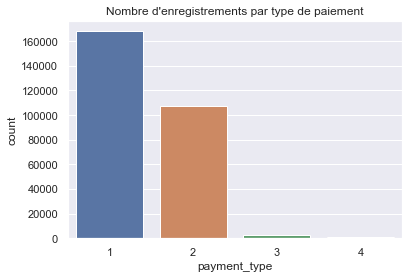

In [48]:
sns.set_theme(style = 'darkgrid')

type_paiement = sns.countplot(x = 'payment_type',  data = taxi)

# afficher les valeurs sur le graphique
#type_paiement.bar_label(type_paiement.containers[0])

plt.title("Nombre d'enregistrements par type de paiement")

Ici, on peut voir que les trajets réglés par carte de crédit d'abord, puis en liquide sont très fréquents. Quelques trajets n'ont pas étaient prélevés et une certaine minorité ont été contestés.

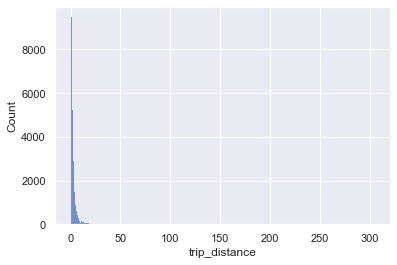

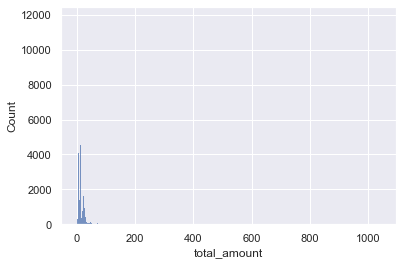

In [49]:
for col in taxi.select_dtypes('float'):
    plt.figure()
    sns.histplot(taxi[col])

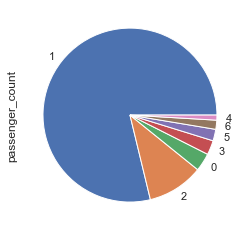

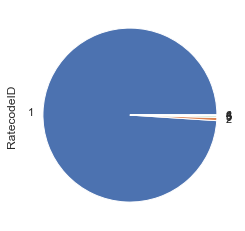

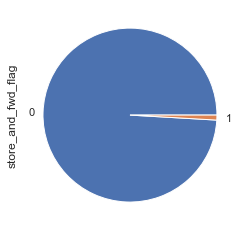

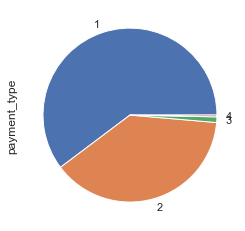

In [50]:
taxi_sans_id = taxi.drop(['VendorID', 'PULocationID', 'DOLocationID'], axis = 1)

for col in taxi_sans_id.select_dtypes('int'):
    plt.figure()
    taxi[col].value_counts().plot.pie()

### Modification des types, les dates

In [51]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
1,1,2020-05-01 00:23:21,2020-05-01 00:26:01,2,0.4,1,0,264,264,1,5.8
2,1,2020-05-01 00:54:58,2020-05-01 00:57:11,1,0.3,1,0,264,264,2,4.8
3,1,2020-05-01 00:07:10,2020-05-01 00:12:46,1,1.7,1,0,107,229,2,10.8
4,1,2020-05-01 00:55:47,2020-05-01 01:01:54,0,0.9,1,0,237,262,1,11.0
5,1,2020-05-01 00:38:37,2020-05-01 01:03:08,0,12.0,1,0,140,28,1,39.3


On passe les dates en datetime pour pouvoir extraire le jour, le mois, l'année, les heures, les minutes, les secondes.
On calcule la durée des trajets.

In [52]:
taxi['tpep_pickup_datetime'] = pd.to_datetime(taxi['tpep_pickup_datetime'])
taxi['tpep_dropoff_datetime'] = pd.to_datetime(taxi['tpep_dropoff_datetime'])

In [53]:
# extraction pour le pickup
taxi['jour_pickup'] = taxi['tpep_pickup_datetime'].dt.day
taxi['mois_pickup'] = taxi['tpep_pickup_datetime'].dt.month
taxi['annee_pickup'] = taxi['tpep_pickup_datetime'].dt.year

taxi['heure_pickup'] = taxi['tpep_pickup_datetime'].dt.hour
taxi['minute_pickup'] = taxi['tpep_pickup_datetime'].dt.minute
taxi['seconds_pickup'] = taxi['tpep_pickup_datetime'].dt.second

# extraction pour le dropoff
taxi['jour_dropoff'] = taxi['tpep_dropoff_datetime'].dt.day
taxi['mois_dropoff'] = taxi['tpep_dropoff_datetime'].dt.month
taxi['annee_dropoff'] = taxi['tpep_dropoff_datetime'].dt.year

taxi['heure_dropoff'] = taxi['tpep_dropoff_datetime'].dt.hour
taxi['minute_dropoff'] = taxi['tpep_dropoff_datetime'].dt.minute
taxi['seconds_dropoff'] = taxi['tpep_dropoff_datetime'].dt.second

# calcul de la durée du trajet
taxi['duree_trajet'] = taxi['tpep_dropoff_datetime'] - taxi['tpep_pickup_datetime']

# on récupère la durée du trajet en minutes
taxi['duree_trajet_minute'] = taxi['duree_trajet'] / np.timedelta64(1, 'm')

# on arrondit
taxi['duree_trajet_minute'] = taxi['duree_trajet_minute'].apply(np.round)

In [54]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,minute_pickup,seconds_pickup,jour_dropoff,mois_dropoff,annee_dropoff,heure_dropoff,minute_dropoff,seconds_dropoff,duree_trajet,duree_trajet_minute
1,1,2020-05-01 00:23:21,2020-05-01 00:26:01,2,0.4,1,0,264,264,1,...,23,21,1,5,2020,0,26,1,0 days 00:02:40,3.0
2,1,2020-05-01 00:54:58,2020-05-01 00:57:11,1,0.3,1,0,264,264,2,...,54,58,1,5,2020,0,57,11,0 days 00:02:13,2.0
3,1,2020-05-01 00:07:10,2020-05-01 00:12:46,1,1.7,1,0,107,229,2,...,7,10,1,5,2020,0,12,46,0 days 00:05:36,6.0
4,1,2020-05-01 00:55:47,2020-05-01 01:01:54,0,0.9,1,0,237,262,1,...,55,47,1,5,2020,1,1,54,0 days 00:06:07,6.0
5,1,2020-05-01 00:38:37,2020-05-01 01:03:08,0,12.0,1,0,140,28,1,...,38,37,1,5,2020,1,3,8,0 days 00:24:31,25.0


Maintenant qu'on a fait nos extractions, on supprime les datetime du dataframe.

In [55]:
taxi.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'duree_trajet'],
         axis = 1,
         inplace = True)

In [56]:
taxi.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount,jour_pickup,...,heure_pickup,minute_pickup,seconds_pickup,jour_dropoff,mois_dropoff,annee_dropoff,heure_dropoff,minute_dropoff,seconds_dropoff,duree_trajet_minute
1,1,2,0.4,1,0,264,264,1,5.8,1,...,0,23,21,1,5,2020,0,26,1,3.0
2,1,1,0.3,1,0,264,264,2,4.8,1,...,0,54,58,1,5,2020,0,57,11,2.0
3,1,1,1.7,1,0,107,229,2,10.8,1,...,0,7,10,1,5,2020,0,12,46,6.0
4,1,0,0.9,1,0,237,262,1,11.0,1,...,0,55,47,1,5,2020,1,1,54,6.0
5,1,0,12.0,1,0,140,28,1,39.3,1,...,0,38,37,1,5,2020,1,3,8,25.0


In [57]:
taxi.dtypes

VendorID                 int64
passenger_count          int64
trip_distance          float64
RatecodeID               int64
store_and_fwd_flag       int64
PULocationID             int64
DOLocationID             int64
payment_type             int64
total_amount           float64
jour_pickup              int64
mois_pickup              int64
annee_pickup             int64
heure_pickup             int64
minute_pickup            int64
seconds_pickup           int64
jour_dropoff             int64
mois_dropoff             int64
annee_dropoff            int64
heure_dropoff            int64
minute_dropoff           int64
seconds_dropoff          int64
duree_trajet_minute    float64
dtype: object

In [58]:
taxi.shape

(279052, 22)

# 3. Construction modèle

SKlearn nous permet de créer des modèles très simplement, en suivant une démarche de travail qui est la même pour chacun des modèles que cette libraire offre:

- on instancie un objet avec un modèle de machine learning
- on entraîne le modèle: model.fit(x_train, y_train) 
- on évalue le modèle: model.score(x_train, y_train, ou x_test, y_test)
- notre prediction: model.predict() 

Notre target 'total_amount' étant une variable de type quantitative, nous avons affaire à un problème de régression supervisée, il convient donc d'utiliser des modèles de régression.

On peut commencer par afficher la matrice de corrélation des différents variables à l'aide d'une heatmap.

<AxesSubplot:>

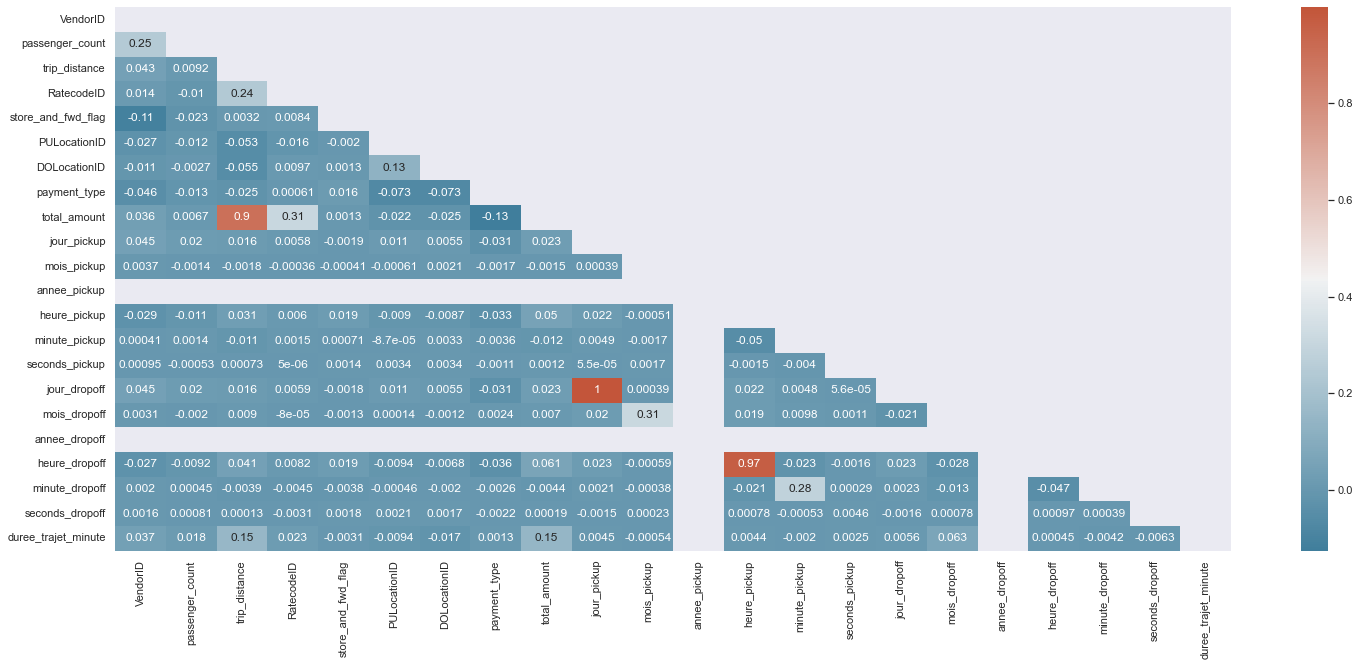

In [59]:
plt.subplots(figsize = (25, 10))

corr = taxi.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot = True, mask = mask, cmap = cmap)

Hormis les variables temporelles, on peut voir ici que la variable 'total_amount' et 'trip_distance' ont une forte corrélation positive (0.9).<br/>
Comparée aux autres variables, on peut dire que le 'rate_code_id' présente une bonne corrélation également.

On peut voir le même aperçu sous forme de tableau, en réalisant un tri décroissant par rapport à la corrélation.

In [60]:
taxi.corr()['total_amount'].sort_values(ascending = False)

total_amount           1.000000
trip_distance          0.899965
RatecodeID             0.306866
duree_trajet_minute    0.146806
heure_dropoff          0.060804
heure_pickup           0.049633
VendorID               0.035674
jour_pickup            0.023144
jour_dropoff           0.023106
mois_dropoff           0.006977
passenger_count        0.006714
store_and_fwd_flag     0.001345
seconds_pickup         0.001240
seconds_dropoff        0.000190
mois_pickup           -0.001541
minute_dropoff        -0.004449
minute_pickup         -0.011855
PULocationID          -0.021557
DOLocationID          -0.025044
payment_type          -0.126468
annee_pickup                NaN
annee_dropoff               NaN
Name: total_amount, dtype: float64

'total_amount' est corrélée à 89% avec 'trip_distance'.

On peut dans un premier temps visualiser une courbe de régression dans un nuage de point.

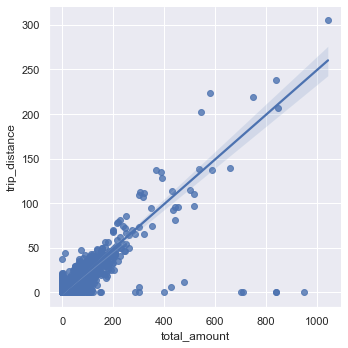

In [61]:
# lmplot: visualiser des courbes de régression dans un nuage de point
sns.lmplot(x = 'total_amount', y = 'trip_distance', data = taxi)

En visualisant ces données, on pourrait dire que pour les clients payent en général moins de 300$ pour les trajets inférieur à 100 miles.

## 3.1 Régression linéaire multiple

On peut utiliser un modèle de régression linéaire pour notre premier modèle. Ayant plusieurs features, on peut faire un modèle de régression linéaire multiple, qui nous permettra de prédire notre target 'total_amount' selon ses differentes features.

#### Mode de fonctionnement

Note: la régression linéaire multiple fonctionne de la même manière qu'une régression linéaire classique, avec de multiples features supplémentaires.

Le but d'une régresion linéaire consiste à calculer la relation entre deux variables. Il y a donc une corrélation directe entre les deux variables, la relation étant représentée par une droite. La variable indépendante nous permet d'expliquer le comportement de la variable dépendante, car le modèle admet que cette dernière est une résultante directe de la variable indépendante.<br/>

#### L'équation mathématique de ce modèle: 
y = b * x + a
- y: la variable dépendante
- x: la variable indépendante
- a et b: des coefficients permettant la détermination de la pente et de l'intercept

#### Le calcul des coefficients

Les coefficients sont calculés de tels sortes à minimiser l'erreur entre la prédiction et la donnée entraînée. Pour chaque x, l'erreur est calculée suivant ce procédé:
- on résout l'équation pour calculer la prédiction de chaque x
- on calcul l'erreur pour chaque x
- on somme les erreurs

L'erreur pouvant portée des valeurs négatives, on l'élève au carré pour avoir des valeurs positives et ainsi ne pas fausser la précision du modèle.

Pour évaluer notre modèle, on se réfère au r2, qui démontre la qualité du modèle. Il est calculé en sommant les erreurs carrés rapporté à la variation totale.

La première étape consiste à découper notre dataset de façon aléatoire afin d'allouer des données aux subset de train et de test. On utilisera ces subsets pour le reste des modèles.

In [62]:
# on ne garde que la target dans le y
y = taxi['total_amount']

# on garde toutes les feaatures dans le x
x = taxi.drop(['total_amount'],
             axis = 1)

# on sépare notre base de travail avec un dataset de test à 0.25
x_train, x_test, y_train, y_test  = train_test_split(x, 
                                                     y, 
                                                     test_size = 0.25, 
                                                     random_state = 0)

On instancie un objet LinearRegression et on entraîne le modèle.

In [63]:
regression_lineaire = LinearRegression()
regression_lineaire.fit(x_train, y_train)

LinearRegression()

On peut réaliser la prédiction.

In [64]:
y_predict = regression_lineaire.predict(x_test)
y_predict

array([ 9.84316658,  8.0272048 , 15.04344605, ..., 62.10874797,
       17.02148234,  8.348246  ])

On calcul ensuite le score.

In [65]:
score = r2_score(y_test, y_predict)

resultat = (
    f"Le R2: {score}, on constate que le modèle s'ajuste assez bien aux données.\n" 
    f"Mean squared error: {mean_squared_error(y_test, y_predict)}.\n"
    f"Racine mean squared error: {np.sqrt(mean_squared_error(y_test,y_predict))}.")
print(resultat)

Le R2: 0.7522285841559091, on constate que le modèle s'ajuste assez bien aux données.
Mean squared error: 44.50563463712442.
Racine mean squared error: 6.671254352602996.


Le MSE nous permet de dire que, pour une prédiction, on a un différentiel d'environ 44 entre la prédiction et la vraie valeur.

Le R2 nous permet de dire que c'est un bon modèle car il est proche de 1.

## 3.2 Arbre de décision

Les arbres de décision peuvent être utilisée à la fois pour des problèmes de classification et des problèmes de régresssion.

#### Mode de fonctionnement

Un arbre de décision est composé de noeuds et de branches. A chaque noeud, on évalue une feature afin de pouvoir créer un 'split', c'est-à-dire qu'on créer un embranchement qui va aboutir à un chemin différent. Les arbres sont construits en évaluant chaque feature de façon récursive, donc on répète le process pour chaque feature, et on créer des noeuds qui split aux mieux le subset.<br/>
Ceci se fait en calculant une mesure (MSE, résidu, etc...) pour la régression et en déterminant des seuils. Chaque noeud correspond ainsi à la meilleure combinaison entre la mesure et le seuil. 

#### Structure d'un arbre

- noeud racine: la racine de l'arbre, on part de lui pour déterminer nos splits
- noeud intermédiaire: noeuds pour lesquelles on évalue nos features, mais ce ne sont pas les noeuds finaux pour la prédiction
- feuille d'un noeud: noeud final, la prédiction se fait ici

Pour évaluer notre modèle, on se réfère au r2, qui démontre la qualité du modèle.

Note: on n'affichera pas d'arbre pour ce modèle, car les arbres de décision concernant les régressions ne sont que peu lisibles, donc difficilé à analyser et interpreter.

In [66]:
arbre_regression = DecisionTreeRegressor(random_state = 0)
arbre_regression.fit(x_train, y_train)

score = arbre_regression.score(x_train, y_train)
score_test = arbre_regression.score(x_test, y_test)

y_pred = arbre_regression.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

result = (
    f"R carré train: {score}.\n"
    f"R carré test: {score_test}.\n"
    f"Mean Squared Error: {mse}.\n"
    f"Racine de Mean Squared Error: {np.sqrt(mse)}")

print(result)

R carré train: 1.0.
R carré test: 0.8092030512873849.
Mean Squared Error: 34.27166632742284.
Racine de Mean Squared Error: 5.85420074198202


Avec un r carré égale à 1 sur le train set, on peut suspecter que notre modèle est sujet au phénomène de "overfitting", c'est-à-dire que notre modèle fit "trop bien" les données. On peut utiliser la méthode de validation croisée pour observer ce phénomène. <br/>

Cross-validate sur 5: permet de train et test le modèle k fois (ici 5) sur différents subsets du train set afin de construire une estimation de la performance du modèle sur des données non-utilisées.<br/>

Fonctionnement d'un cross-validation:<br/>
- on partitionne notre dataset selon un nombre de subset (sous-dataset)<br/>
- on met de côté un subset et on entraîne le modèle sur les subsets restants<br/>
- on test le modèle sur le subset qu'on a mis de côté<br/>

On répète ce fonctionnement sur chaque subset qu'on a créer.

In [67]:
precision_k_fold = cross_val_score(arbre_regression, x_train, y_train, cv = 10)
print(precision_k_fold)

[0.69525773 0.83227951 0.77096419 0.88961029 0.85598012 0.83116624
 0.66615328 0.88164804 0.87004739 0.85092814]


La précision du modèle est la moyenne de la précision de chaque fold.

In [68]:
f"Précision de chaque modèle avec la Cross-Validation: {precision_k_fold.mean() * 100}."

'Précision de chaque modèle avec la Cross-Validation: 81.44034920822232.'

In [69]:
reg_decision_model = DecisionTreeRegressor(max_depth = 10)

reg_decision_model.fit(x_train, y_train)

score = reg_decision_model.score(x_train, y_train)
score_test = reg_decision_model.score(x_test, y_test)

result = (
    f"R carré train: {score}.\n"
    f"R carré test: {score_test}.\n")

print(result)

R carré train: 0.9582925569362368.
R carré test: 0.8385946785738199.



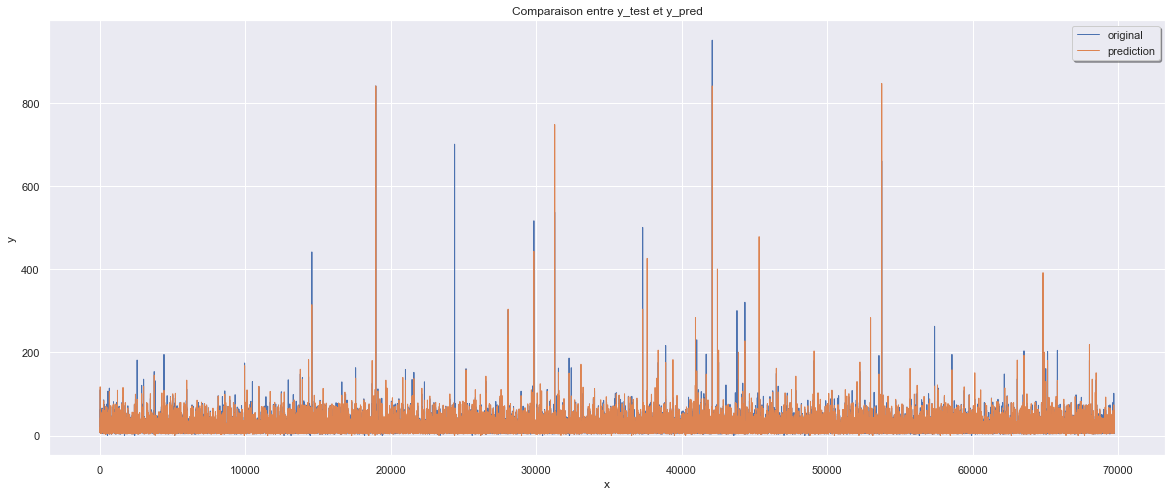

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,8))
plt.plot(x_ax, y_test, linewidth = 1, label = 'original')
plt.plot(x_ax, y_pred, linewidth = 1, label = 'prediction')
plt.title('Comparaison entre y_test et y_pred')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.show()

## 3.3 K plus proches voisins

Les K plus proches voisins peuvent être utilisées à la fois pour des problèmes de classification et des problèmes de régresssion.

#### Mode de fonctionnement

En partant du principe que k représente le nombre de voisins, pour une régression, on prend la valeur moyenne des k points les plus proches. En d'autres termes, on observe la proximité des individus les uns par rapport aux autres. Cette dernière est donc déterminer par un calcul de distance.

#### L'algorithme KNN
- on charge le dataset
- on initialise k le nombre de voisins
- pour chaque valeur dans le dataset
    - on calcule la distance entre les valeurs
    - on ajoute la distance et l'index dans une collection ordonnée
- on trie la collection de la plus petite à la plus grande distance
- on prend le premier k
- on récupère les labels du k qu'on a sélectionné
- on retourne la moyenne des k labels

Pour évaluer notre modèle, on se réfère au r2, qui démontre la qualité du modèle.

In [ ]:
# nombre de voisins égales à cinq
k_neighbors = neighbors.KNeighborsRegressor(n_neighbors = 5)

k_neighbors.fit(x_train, y_train) # fit le modèle

score_neighbors = k_neighbors.score(x_train, y_train)


prediction = k_neighbors.predict(x_test) # prédiction sur le test
mse_neighbors = mean_squared_error(y_test, prediction)
erreur = sqrt(mean_squared_error(y_test, prediction)) # calcul rmse

resultat_forest = (
    f"R carré: {score_neighbors}.\n"
    f"Mean Squared Error: {mse_neighbors}.\n"
    f"Racine de Mean Squared Error: {erreur}")

print(resultat_forest)

R carré: 0.7942527068414751.
Mean Squared Error: 69.15872002734973.
Racine de Mean Squared Error: 8.316172198033764


In [ ]:
output = (
    f"Score train: {k_neighbors.score(x_train, y_train)}.\n"
    f"Score test: {k_neighbors.score(x_test, y_test)}")
    
print(output)

Score train: 0.7942527068414751.
Score test: 0.6149801228798142


Validation curve pour trouver le modèle avec les meilleurs paramètres. Elle va itérer à travers les k, qui ici correspondent à nos nombres de voisins, pour trouver la meilleur valeur.

In [ ]:
k_neighbors_opti = neighbors.KNeighborsRegressor()
k = np.arange(1, 10)

train_score, val_score = validation_curve(k_neighbors_opti, x_train, y_train, param_name = 'n_neighbors', param_range = k, cv = 5)

KeyboardInterrupt: 

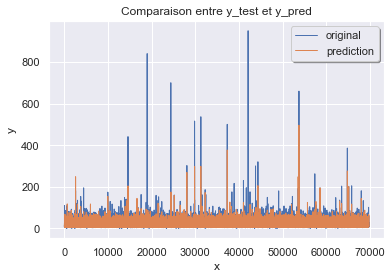

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth = 1, label = 'original')
plt.plot(x_ax, prediction, linewidth = 1, label = 'prediction')
plt.title('Comparaison entre y_test et y_pred')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.show()

## 3.4 Forêts aléatoires

Les Random Forest peuvent être utilisées à la fois pour des problèmes de classification et des problèmes de régresssion.

#### Mode de fonctionnement

On créer des arbres de décision basée sur différents échantillons et on récupère la moyenne dans le cadre d'une régression. Ce modèle se base sur un des méthodes de tirage, ce qui signifie combiner de multiples modèles. On utilise ainsi une collection de modèle plutôt qu'un modèle individuel.

#### Méthode de tirage: Bagging

Cette méthode construit, à partir d'un échantillon tiré aléatoirement, de nouveaux échantillons tirés aléatoirement.

#### Algorithme forêt aléatoire
- on tire n random forest que l'on tire du dataset avec k nombre de lignes
- on construit des arbres de décision pour chaque échantillon
- chaque arbre génère un output
- l'output final est déterminé par la moyenne des output

Pour évaluer notre modèle, on se réfère au r2, qui démontre la qualité du modèle.

On instancie un objet RandomForestRegressor et on applique le modèle.

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x, y) 

KeyboardInterrupt: 

In [ ]:
Y_pred = regressor.predict(x_test)  

In [ ]:
score = regressor.score(x_train, y_train)
score_test = regressor.score(x_test, y_test)


In [ ]:
result = (
    f"R carré train: {score}.\n"
    f"R carré test: {score_test}.\n")

print(result)

R carré train: 0.9880684825453325.
R carré test: 0.9885934760901396.

